In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy 

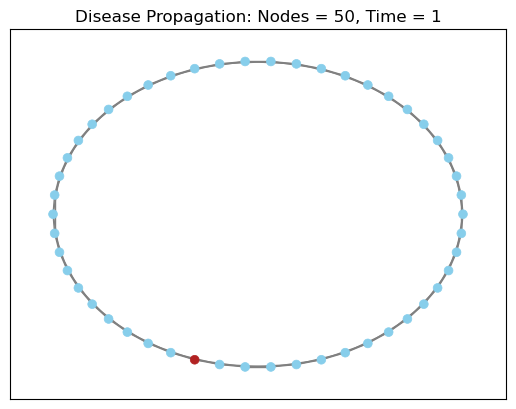

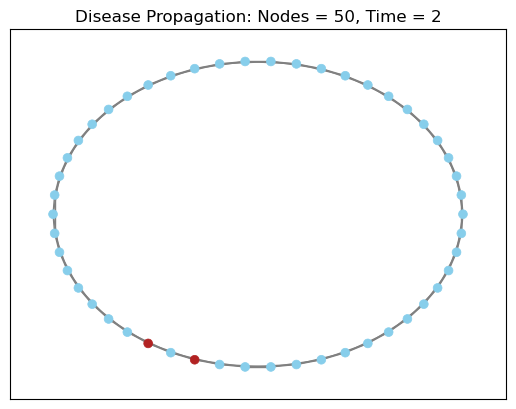

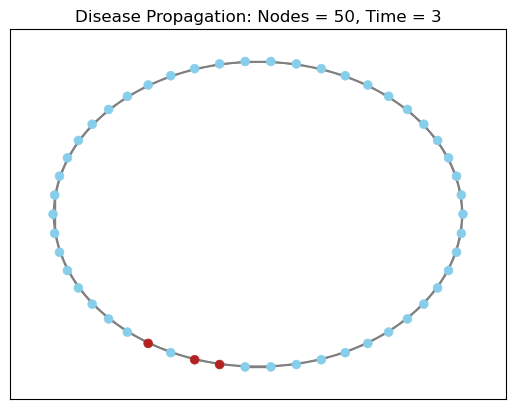

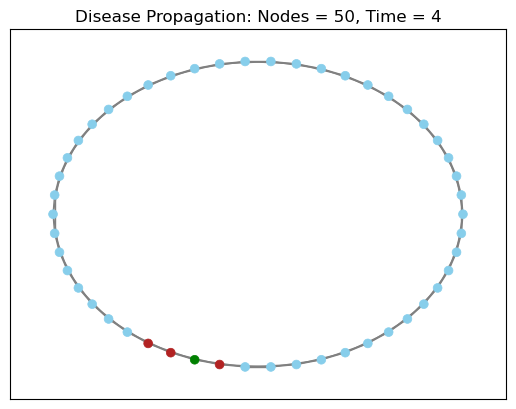

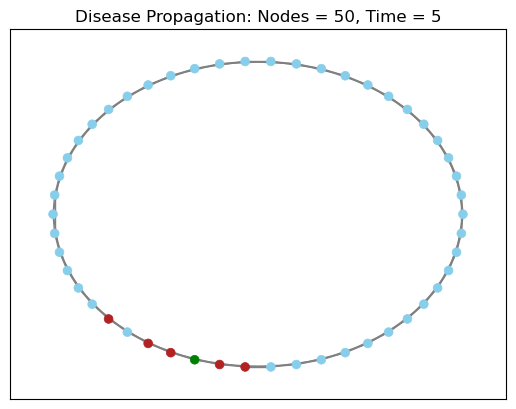

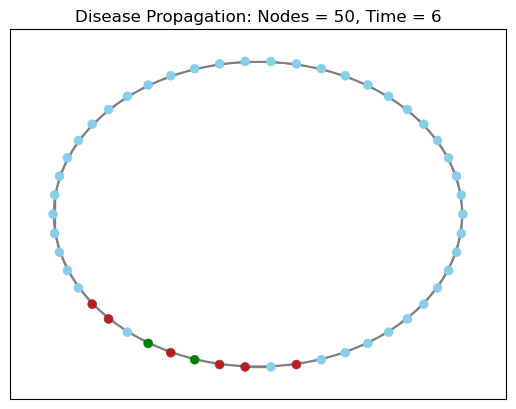

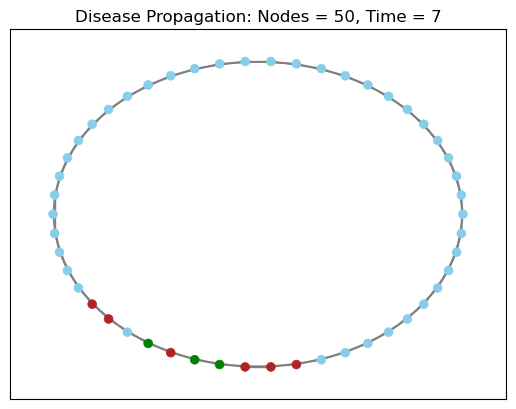

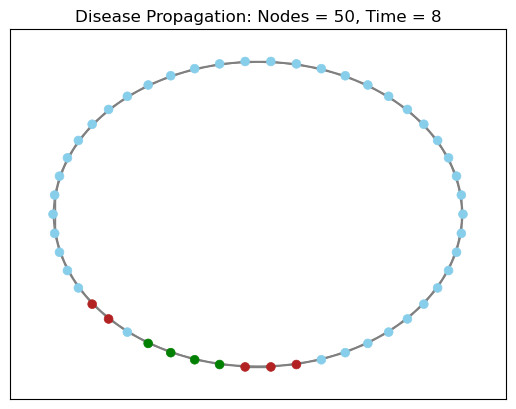

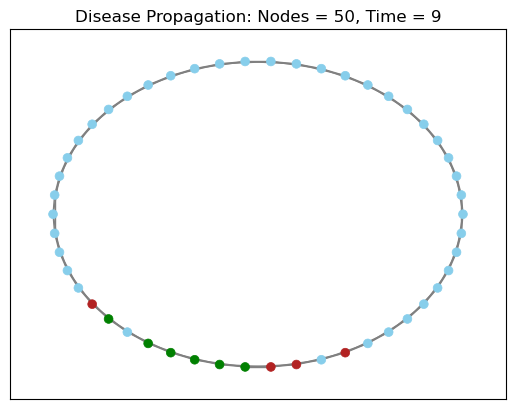

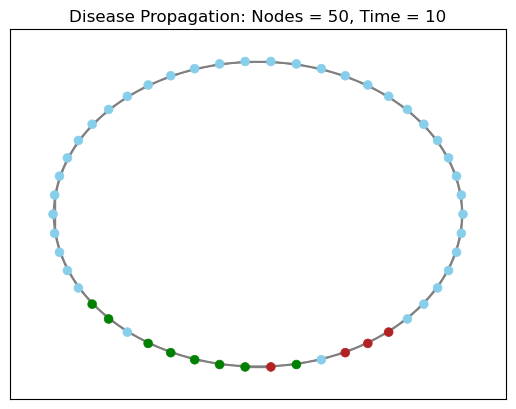

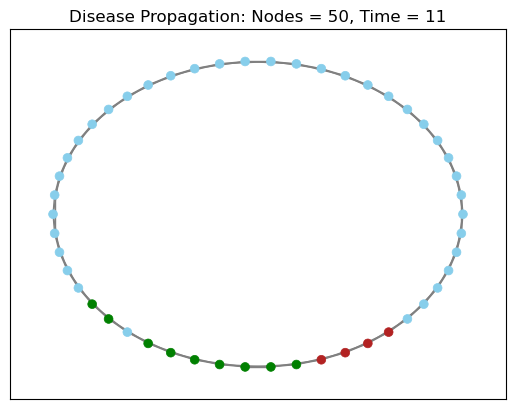

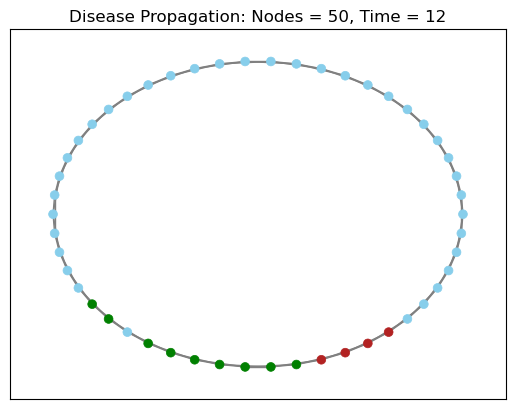

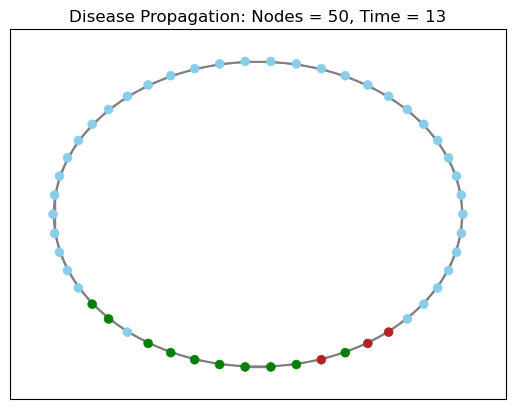

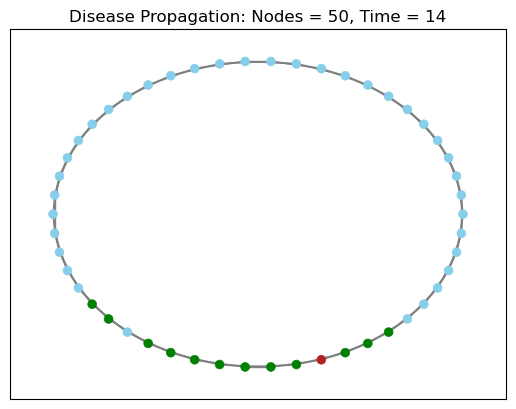

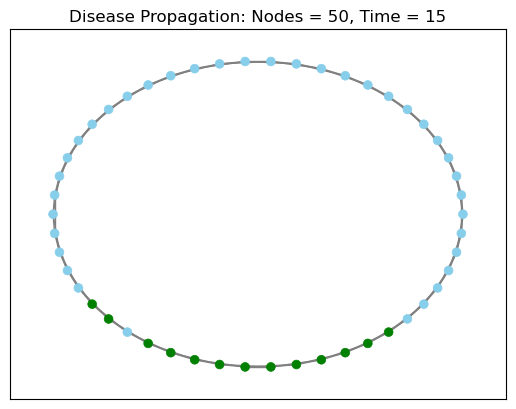

(15, 13)

In [66]:
class gen_propagate():
    def __init__(self, G, pandemicprob: float ,initialsick = 1, TTR = 10):
        self.g = G
        self.pos = nx.circular_layout(self.g)
        self.n = G.number_of_nodes()
        self.t = 0
        self.p = pandemicprob
        if not initialsick:
            self.sicknodes = set([])
        else:
            for i in range(initialsick):
                self.sicknodes = set([np.random.randint(self.g.number_of_nodes())])
                
        self.recovered = set([])
        self.TTR = TTR # days to recover, default is 15, customisable dependent on model

        # initialise TTR
        initial_TTR_vals = [0 if i not in self.sicknodes else TTR + 1 for i in range(self.n)]
        initial_TTR_dict = {i:initial_TTR_vals[i] for i in range(self.n)}
        nx.set_node_attributes(self.g, initial_TTR_dict, name = 'TTR')
    
    
    def plot(self):
        node_colors = ["firebrick" if node in self.sicknodes else "green" if node in self.recovered else "skyblue" for node in self.g.nodes()]
        nx.draw_networkx(self.g, pos = self.pos, with_labels=False, node_size=2000/self.n, node_color=node_colors, edge_color="gray", linewidths=0.5)
        plt.title("Disease Propagation: Nodes = "+ str(self.n)+ ", Time = " + str(self.t))
        plt.show()
        return
    
    #def sicknode
    def go(self, plot = False):
        #Plot initial network
        while len(self.sicknodes) > 0 and len(self.sicknodes)+len(self.recovered) < self.n: #Propagate until everyone has recovered or everyone is either sick or recovered
            currentsick = copy.copy(self.sicknodes)
            
            #Dealing with recovery
            for i in range(len(list(self.g.nodes))): 
                if self.g.nodes[i]['TTR'] - 1 == 0: # end of infectious period
                    self.sicknodes.remove(i)
                    self.recovered.add(i)
                    nx.set_node_attributes(self.g, {i: self.g.nodes[i]['TTR'] - 1}, name='TTR') # decrement TTR value
                elif self.g.nodes[i]['TTR'] == 0: # not infectious, no action
                    pass
                else: # mid infectious period
                    nx.set_node_attributes(self.g, {i: self.g.nodes[i]['TTR'] - 1}, name='TTR') # decrement TTR value
            
            #Checking for spread
            currentsick = copy.copy(self.sicknodes) #as new sick nodes may be created and we don't want to loop through the new ones
            #print("sicknodes:", currentsick)
            for node in currentsick:
                #print("sicknode:",node)
                neighbours = list(self.g.neighbors(node))
                #try to propagate sickness
                for neighbour in neighbours:
                    if neighbour in self.sicknodes or neighbour in self.recovered:
                        pass
                    elif np.random.random() < self.p:
                        self.sicknodes.add(neighbour)
                        nx.set_node_attributes(self.g, {neighbour:self.TTR + 1}, name = 'TTR') # initialise infectious node
                
            self.t += 1 #timestep increase by 1
            #print(len(self.sicknodes))
            if plot == True:
                self.plot()
                
        return self.t, len(self.recovered)+len(self.sicknodes)
    
g = nx.watts_strogatz_graph(50, k = 4, p = 0)   
test = gen_propagate(g, 0.2, 1, 3)
test.go(True)

## Comparing Network Topologies
To compare how network topologies affect the spread of a disease, look at how the number of nodes and the average number of edges affect the speed of disease spread

In [7]:
def average_edges(g):
    return (2*g.number_of_edges())/g.number_of_nodes()

import networkx as nx
n = 10000
m = 1
g = nx.barabasi_albert_graph(n, m, seed= None, initial_graph = None)
#g = nx.watts_strogatz_graph(n = 5000, k = m, p = 0.4, seed=None)
print(average_edges(g))

1.9998


In [28]:
#When comparing the number of nodes to timesteps required to infect entire population keep average edges per node to be approximately 4

ring_timesteps = []
nodes = [10,50,100,500,1000,2000,5000,10000,25000,50000,75000,100000, 150000,200000,250000,300000] 
m = 2
k = 4
SWt = []
Ringt = []
SFt = []
SWE = []
SFE = []
ring_infected = []
sw_infected = []
sf_infected = []
for j in range(10):
    ring_timesteps = []
    SW_timesteps = []
    BA_timesteps = []
    avg_BA_edge = []
    avg_SW_edge = []
    rinfected = []
    swinfected = []
    sfinfected = []
    for i in range(len(nodes)):
        n = nodes[i]
        print(n)

        #Barabasi
        g = nx.barabasi_albert_graph(n, m, seed= None, initial_graph = None)
        BA_prop = gen_propagate(g, 0.2, 1, 5)
        time, infected = BA_prop.go()
        BA_timesteps.append(time)
        sfinfected.append(infected)
        avg_BA_edge.append(average_edges(g))

        #Small World
        g = nx.watts_strogatz_graph(n= n, k = k, p = 0.2) #let random be 0.5
        SW_prop = gen_propagate(g, 0.2, 1, 5)
        time, infected = SW_prop.go()
        SW_timesteps.append(time)
        swinfected.append(infected)
        avg_SW_edge.append(average_edges(g))

        #Ring
        g = nx.watts_strogatz_graph(n= n, k = k, p = 0)
        ring_prop = gen_propagate(g, 0.2, 1, 5)
        time, infected = ring_prop.go()
        ring_timesteps.append(time)
        rinfected.append(infected)
        
        
    #timesteps
    SWt.append(SW_timesteps)
    SWE.append(avg_SW_edge)
    Ringt.append(ring_timesteps)
    #edges
    SFt.append(BA_timesteps)
    SFE.append(avg_BA_edge)
    #total infected
    ring_infected.append(rinfected)
    sw_infected.append(swinfected)
    sf_infected.append(sfinfected)
    

10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000


In [29]:
def average(points: list[list]):
    mean_list = []
    std_list = []
    for i in range(len(points[0])):
        mean_list.append(np.mean([points[j][i] for j in range(len(points))]))
        std_list.append(np.std([points[j][i] for j in range(len(points))]))
        
    return mean_list, std_list

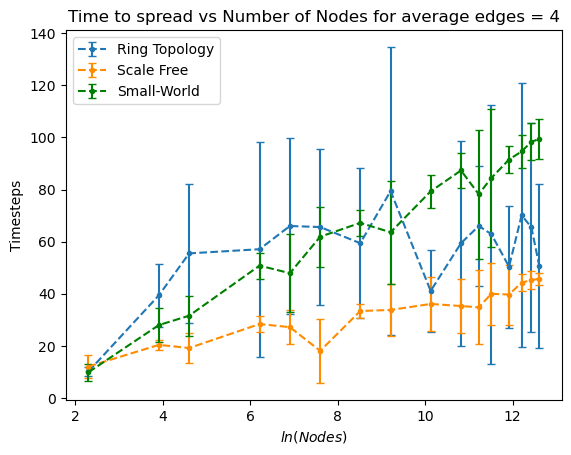

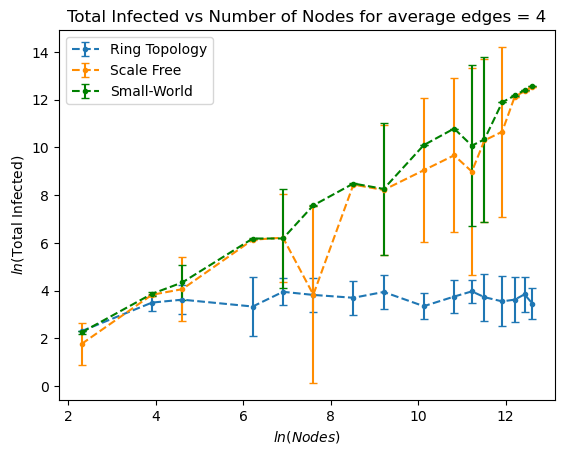

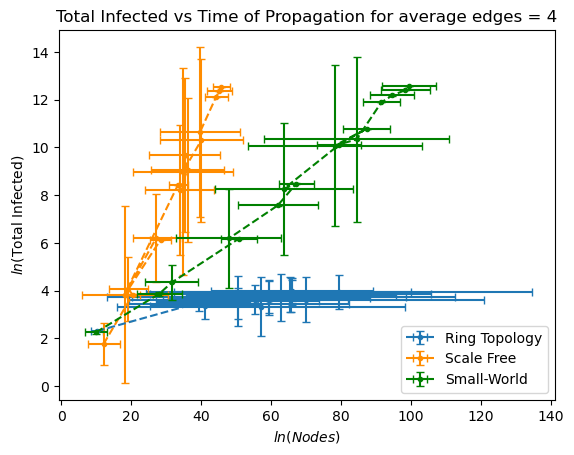

[2.302585092994046, 3.497765175433627, 3.6204425655113797, 3.3338481540789333, 3.9496161983569755, 3.81947270213409, 3.69993196181958, 3.943091274071299, 3.3479736321361804, 3.749807028523377, 3.9676896565803252, 3.725054813593976, 3.549253433766661, 3.6218782069436086, 3.8432226590023504, 3.450786267899803]


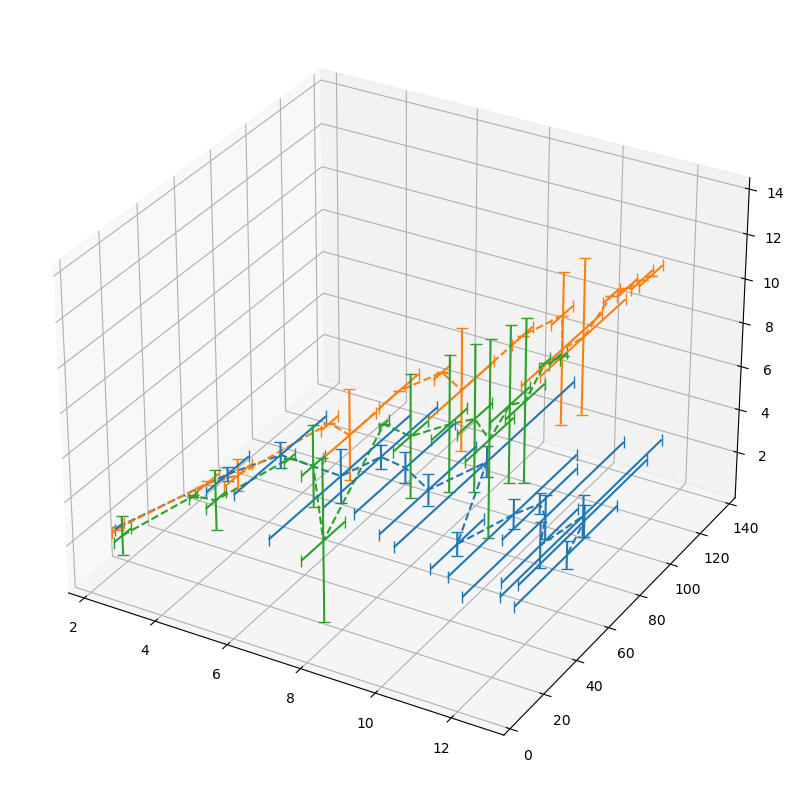

In [63]:
import matplotlib.pyplot as plt
import numpy as np

#Averaging times
mean_SWtime, err_SWtime = average(SWt)
mean_Ringtime, err_Ringtime = average(Ringt)
mean_SFtime, err_SFtime = average(SFt)

#Averaging edges
mean_SWedge, err_SWedge = average(SWE)
mean_SFedge, err_SFedge = average(SFE)

#Time vs nodes
plt.errorbar(np.log(nodes), mean_Ringtime, yerr= err_Ringtime, label = "Ring Topology", marker = '.', linestyle = 'dashed', capsize = 3)
plt.errorbar(np.log(nodes), mean_SFtime, yerr = err_SFtime, label = "Scale Free", marker = '.', linestyle = 'dashed', capsize = 3, color = 'darkorange')
plt.errorbar(np.log(nodes), mean_SWtime, yerr = err_SWtime, label = "Small-World", marker = '.', linestyle = 'dashed', capsize = 3, color = 'green')
plt.legend()
plt.ylabel("Timesteps")
plt.xlabel(r"$ln(Nodes)$")
plt.title("Time to spread vs Number of Nodes for average edges = 4")
plt.show()

#Averaging number of people infected
mean_rinfected, err_rinfected = average(np.log(ring_infected))
mean_swinfected, err_swinfected = average(np.log(sw_infected))
mean_sfinfected, err_sfinfected = average(np.log(sf_infected))

#Infected vs nodes
plt.errorbar(np.log(nodes), mean_rinfected, yerr= err_rinfected, label = "Ring Topology", marker = '.', linestyle = 'dashed', capsize = 3)
plt.errorbar(np.log(nodes), mean_sfinfected, yerr = err_sfinfected, label = "Scale Free", marker = '.', linestyle = 'dashed', capsize = 3, color = 'darkorange')
plt.errorbar(np.log(nodes), mean_swinfected, yerr = err_swinfected, label = "Small-World", marker = '.', linestyle = 'dashed', capsize = 3, color = 'green')
plt.legend()
plt.ylabel(r"$ln$(Total Infected)")
plt.xlabel(r"$ln(Nodes)$")
plt.title("Total Infected vs Number of Nodes for average edges = 4")
plt.show()

#Infected vs time of spread
#plt.errorbar(mean_Ringtime, mean_rinfected, xerr=err_Ringtime, yerr= err_rinfected, label = "Ring Topology", marker = '.', linestyle = 'dashed', capsize = 3)
#plt.errorbar(mean_SFtime, mean_sfinfected, xerr = err_SFtime,yerr = err_sfinfected, label = "Scale Free", marker = '.', linestyle = 'dashed', capsize = 3, color = 'darkorange')
#plt.errorbar(mean_SWtime, mean_swinfected, xerr = err_SWtime,yerr = err_swinfected, label = "Small-World", marker = '.', linestyle = 'dashed', capsize = 3, color = 'green')
#plt.legend()
#plt.ylabel(r"$ln$(Total Infected)")
#plt.xlabel(r"$ln(Nodes)$")
#plt.title("Total Infected vs Time of Propagation for average edges = 4")
#plt.show()

#3D plot
ax = plt.figure(figsize = (10,20)).add_subplot(projection='3d')
print(mean_rinfected)
ax.errorbar(np.log(nodes), mean_Ringtime, mean_rinfected, yerr = err_Ringtime, zerr = err_rinfected, linestyle = 'dashed', capsize = 4, label = 'Ring')
ax.errorbar(np.log(nodes), mean_SWtime, mean_swinfected, yerr = err_SWtime, zerr = err_swinfected, linestyle = 'dashed', capsize = 4, label = 'Small World')
ax.errorbar(np.log(nodes), mean_SFtime, mean_sfinfected, yerr = err_SFtime, zerr = err_sfinfected, linestyle = 'dashed', capsize = 4)
plt.show()


## Investigating how changing average connection per node affects propagation

In [80]:
ring_times = []
ring_edges = []
ring_infected = []
BA_times = []
BA_edges = []
BA_infected = []
SW_times = []
SW_edges = []
SW_infected = []
n = 50000
for j in range(5):
    print(j)
    rtime, redge, rinfected  = [], [], []
    swtime, swedge, swinfected = [], [], []
    sftime, sfedge, sfinfected = [], [], []
    ksw, kring = 2, 2
    m = 1
    for i in range(10):
        print(i)
        #Barabasi
        g = nx.barabasi_albert_graph(n, m, seed= None, initial_graph = None)
        BA_prop = gen_propagate(g, 0.2, 1, 5)
        time, infected = BA_prop.go()
        sftime.append(time)
        sfinfected.append(infected)
        sfedge.append(average_edges(g))
        print('SF')

        #Small World
        g = nx.watts_strogatz_graph(n= n, k = ksw, p = 0.2) #let random be 0.5
        SW_prop = gen_propagate(g, 0.2, 1, 5)
        time, infected = SW_prop.go()
        swtime.append(time)
        swinfected.append(infected)
        swedge.append(average_edges(g))
        print('SW')

        #Ring
        g = nx.watts_strogatz_graph(n= n, k = kring, p = 0)
        ring_prop = gen_propagate(g, 0.2, 1, 5)
        time, infected = ring_prop.go()
        rtime.append(time)
        rinfected.append(infected)
        redge.append(average_edges(g))
        print('Ring')

        m += 1
        ksw += 2
        kring *= 2
    
    ring_times.append(rtime)
    ring_edges.append(redge)
    ring_infected.append(rinfected)
    BA_times.append(sftime)
    BA_edges.append(sfedge)
    BA_infected.append(sfinfected)
    SW_times.append(swtime)
    SW_edges.append(swedge)
    SW_infected.append(swinfected)
    

0
0
SF
SW
Ring
1
SF
SW
Ring
2
SF
SW
Ring
3
SF
SW
Ring
4
SF
SW
Ring
5
SF
SW
Ring
6
SF
SW
Ring
7
SF
SW
Ring
8
SF
SW
Ring
9
SF
SW
Ring
1
0
SF
SW
Ring
1
SF
SW
Ring
2
SF
SW
Ring
3
SF
SW
Ring
4
SF
SW
Ring
5
SF
SW
Ring
6
SF
SW
Ring
7
SF
SW
Ring
8
SF
SW
Ring
9
SF
SW
Ring
2
0
SF
SW
Ring
1
SF
SW
Ring
2
SF
SW
Ring
3
SF
SW
Ring
4
SF
SW
Ring
5
SF
SW
Ring
6
SF
SW
Ring
7
SF
SW
Ring
8
SF
SW
Ring
9
SF
SW
Ring
3
0
SF
SW
Ring
1
SF
SW
Ring
2
SF
SW
Ring
3
SF
SW
Ring
4
SF
SW
Ring
5
SF
SW
Ring
6
SF
SW
Ring
7
SF
SW
Ring
8
SF
SW
Ring
9
SF
SW
Ring
4
0
SF
SW
Ring
1
SF
SW
Ring
2
SF
SW
Ring
3
SF
SW
Ring
4
SF
SW
Ring
5
SF
SW
Ring
6
SF
SW
Ring
7
SF
SW
Ring
8
SF
SW
Ring
9
SF
SW
Ring


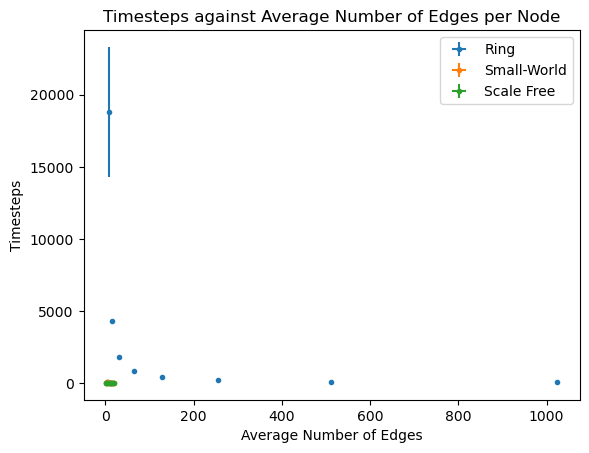

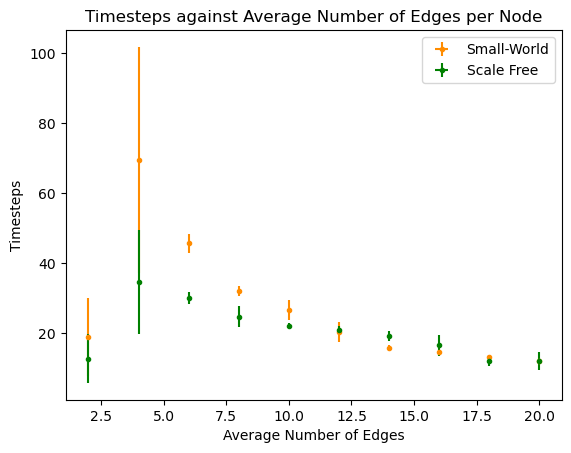

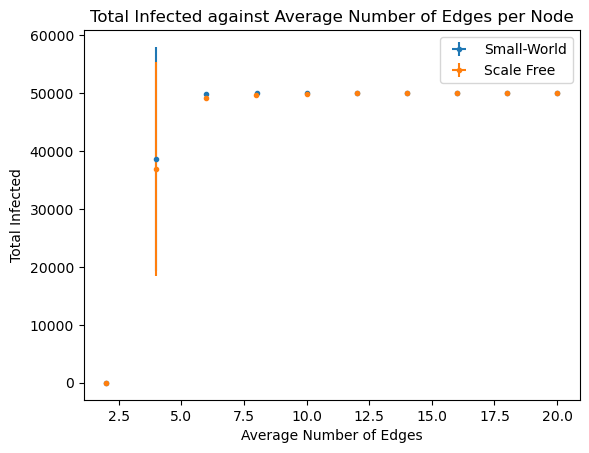

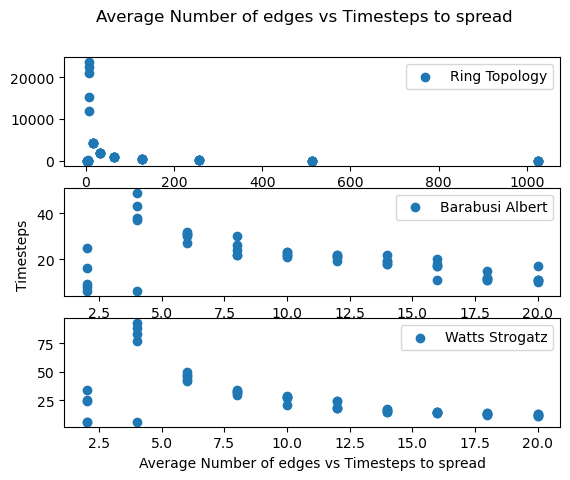

In [94]:
#Ring
meanring_t, stdring_t = average(ring_times)
meanring_e, stdring_e = average(ring_edges)
meanring_i, stdring_i = average(ring_infected)
#SW
meansw_t, stdsw_t = average(SW_times)
meansw_e, stdsw_e = average(SW_edges)
meansw_i, stdsw_i = average(SW_infected)
#SF
meansf_t, stdsf_t = average(BA_times)
meansf_e, stdsf_e = average(BA_edges)
meansf_i, stdsf_i = average(BA_infected)


plt.errorbar(meanring_e, meanring_t, yerr = stdring_t, xerr = stdring_e, marker = '.', linestyle = 'None', label = 'Ring')
plt.errorbar(meansw_e, meansw_t, yerr = stdsw_t, xerr = stdsw_e, marker = '.', linestyle = 'None', label = 'Small-World')
plt.errorbar(meansf_e, meansf_t, yerr = stdsf_t, xerr = stdsf_e, marker = '.', linestyle = 'None', label = 'Scale Free')
plt.xlabel("Average Number of Edges")
plt.ylabel("Timesteps")
plt.title("Timesteps against Average Number of Edges per Node")
plt.legend()
plt.show()

#plt.errorbar(meanring_e, meanring_t, yerr = stdring_t, xerr = stdring_e, marker = '.', linestyle = 'None')
plt.errorbar(meansw_e, meansw_t, yerr = stdsw_t, xerr = stdsw_e, marker = '.', linestyle = 'None', label = 'Small-World', color = 'darkorange')
plt.errorbar(meansf_e, meansf_t, yerr = stdsf_t, xerr = stdsf_e, marker = '.', linestyle = 'None', label = 'Scale Free', color = 'green')
plt.xlabel("Average Number of Edges")
plt.ylabel("Timesteps")
plt.title("Timesteps against Average Number of Edges per Node")
plt.legend()
plt.show()

#infected vs average number of edges
#plt.errorbar(meanring_e, meanring_i, yerr = stdring_i, xerr = stdring_e, marker = '.', linestyle = 'None', label = 'Ring')
plt.errorbar(meansw_e, meansw_i, yerr = stdsw_i, xerr = stdsw_e, marker = '.', linestyle = 'None', label = 'Small-World')
plt.errorbar(meansf_e, meansf_i, yerr = stdsf_i, xerr = stdsf_e, marker = '.', linestyle = 'None', label = 'Scale Free')
plt.xlabel("Average Number of Edges")
plt.ylabel("Total Infected")
plt.title("Total Infected against Average Number of Edges per Node")
plt.legend()
plt.show()


fig, (ax0,ax1,ax2) = plt.subplots(3)
ax0.scatter(ring_edges, ring_times, label = "Ring Topology")
ax1.scatter(BA_edges, BA_times, label = "Barabusi Albert")
ax2.scatter(SW_edges, SW_times, label = "Watts Strogatz")
ax0.legend()
ax1.legend()
ax2.legend()
ax2.set_xlabel("Average Number of edges vs Timesteps to spread")
fig.text(0.05, 0.4,"Timesteps", rotation = 'vertical')
plt.suptitle("Average Number of edges vs Timesteps to spread")
plt.show()

In [91]:
print(meanring_t)
print(meanring_i)

[15.6, 66.6, 18821.2, 4336.6, 1820.4, 842.0, 405.8, 199.0, 99.0, 50.0]
[6.2, 67.2, 49993.4, 50000.0, 50000.0, 50000.0, 50000.0, 50000.0, 50000.0, 50000.0]


Performing the same test on the Small-World and Scale Free but with greater range and repetitions, and larger number of nodes

In [96]:
BA_times = []
BA_edges = []
BA_infected = []
SW_times = []
SW_edges = []
SW_infected = []
n = 100000
for j in range(10):
    print(j)
    swtime, swedge, swinfected = [], [], []
    sftime, sfedge, sfinfected = [], [], []
    ksw = 2
    m = 1
    for i in range(20):
        print(i)
        #Barabasi
        g = nx.barabasi_albert_graph(n, m, seed= None, initial_graph = None)
        BA_prop = gen_propagate(g, 0.2, 1, 5)
        time, infected = BA_prop.go()
        sftime.append(time)
        sfinfected.append(infected)
        sfedge.append(average_edges(g))
        print('SF')

        #Small World
        g = nx.watts_strogatz_graph(n= n, k = ksw, p = 0.2) #let random be 0.5
        SW_prop = gen_propagate(g, 0.2, 1, 5)
        time, infected = SW_prop.go()
        swtime.append(time)
        swinfected.append(infected)
        swedge.append(average_edges(g))
        print('SW')

        m += 1
        ksw += 2
    
    BA_times.append(sftime)
    BA_edges.append(sfedge)
    BA_infected.append(sfinfected)
    SW_times.append(swtime)
    SW_edges.append(swedge)
    SW_infected.append(swinfected)
    

0
0
SF
SW
1
SF
SW
2
SF
SW
3
SF
SW
4
SF
SW
5
SF
SW
6
SF
SW
7
SF
SW
8
SF
SW
9
SF
SW
10
SF
SW
11
SF
SW
12
SF
SW
13
SF
SW
14
SF
SW
15
SF
SW
16
SF
SW
17
SF
SW
18
SF
SW
19
SF
SW
1
0
SF
SW
1
SF
SW
2
SF
SW
3
SF
SW
4
SF
SW
5
SF
SW
6
SF
SW
7
SF
SW
8
SF
SW
9
SF
SW
10
SF
SW
11
SF
SW
12
SF
SW
13
SF
SW
14
SF
SW
15
SF
SW
16
SF
SW
17
SF
SW
18
SF
SW
19
SF
SW
2
0
SF
SW
1
SF
SW
2
SF
SW
3
SF
SW
4
SF
SW
5
SF
SW
6
SF
SW
7
SF
SW
8
SF
SW
9
SF
SW
10
SF
SW
11
SF
SW
12
SF
SW
13
SF
SW
14
SF
SW
15
SF
SW
16
SF
SW
17
SF
SW
18
SF
SW
19
SF
SW
3
0
SF
SW
1
SF
SW
2
SF
SW
3
SF
SW
4
SF
SW
5
SF
SW
6
SF
SW
7
SF
SW
8
SF
SW
9
SF
SW
10
SF
SW
11
SF
SW
12
SF
SW
13
SF
SW
14
SF
SW
15
SF
SW
16
SF
SW
17
SF
SW
18
SF
SW
19
SF
SW
4
0
SF
SW
1
SF
SW
2
SF
SW
3
SF
SW
4
SF
SW
5
SF
SW
6
SF
SW
7
SF
SW
8
SF
SW
9
SF
SW
10
SF
SW
11
SF
SW
12
SF
SW
13
SF
SW
14
SF
SW
15
SF
SW
16
SF
SW
17
SF
SW
18
SF
SW
19
SF
SW
5
0
SF
SW
1
SF
SW
2
SF
SW
3
SF
SW
4
SF
SW
5
SF
SW
6
SF
SW
7
SF
SW
8
SF
SW
9
SF
SW
10
SF
SW
11
SF
SW
12
SF
SW
13
SF
SW
14
SF
SW
15
SF
SW
16
S

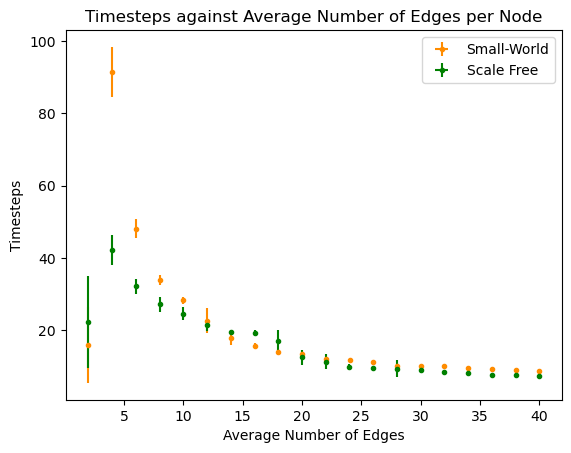

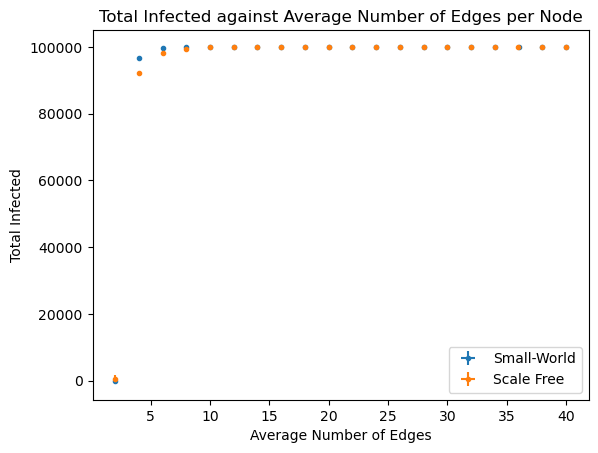

In [97]:
#SW
meansw_t, stdsw_t = average(SW_times)
meansw_e, stdsw_e = average(SW_edges)
meansw_i, stdsw_i = average(SW_infected)
#SF
meansf_t, stdsf_t = average(BA_times)
meansf_e, stdsf_e = average(BA_edges)
meansf_i, stdsf_i = average(BA_infected)

#Time vs Edges
plt.errorbar(meansw_e, meansw_t, yerr = stdsw_t, xerr = stdsw_e, marker = '.', linestyle = 'None', label = 'Small-World', color = 'darkorange')
plt.errorbar(meansf_e, meansf_t, yerr = stdsf_t, xerr = stdsf_e, marker = '.', linestyle = 'None', label = 'Scale Free', color = 'green')
plt.xlabel("Average Number of Edges")
plt.ylabel("Timesteps")
plt.title("Timesteps against Average Number of Edges per Node")
plt.legend()
plt.show()

#infected vs average number of edges
plt.errorbar(meansw_e, meansw_i, yerr = stdsw_i, xerr = stdsw_e, marker = '.', linestyle = 'None', label = 'Small-World')
plt.errorbar(meansf_e, meansf_i, yerr = stdsf_i, xerr = stdsf_e, marker = '.', linestyle = 'None', label = 'Scale Free')
plt.xlabel("Average Number of Edges")
plt.ylabel("Total Infected")
plt.title("Total Infected against Average Number of Edges per Node")
plt.legend()
plt.show()


# Plotting all types of graphs

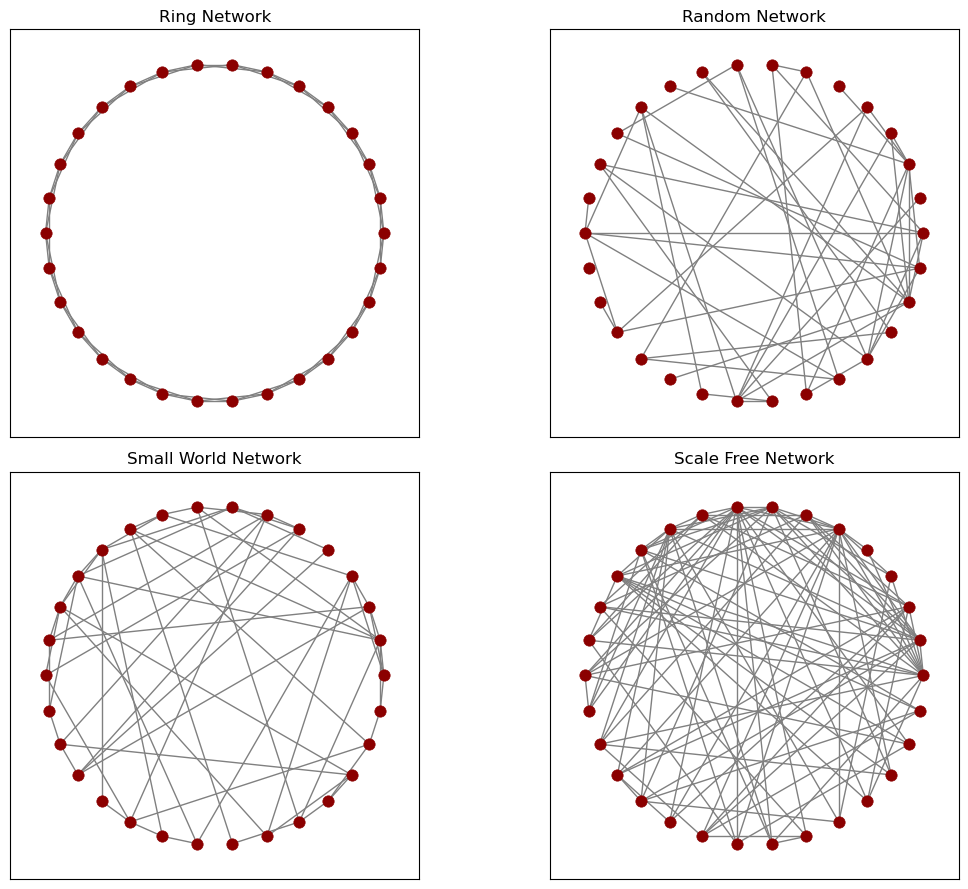

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

# Create graphs
g1 = nx.watts_strogatz_graph(30, k=4, p=0)   
g2 = nx.erdos_renyi_graph(n=30, p=0.1, seed=None, directed=False)
g3 = nx.watts_strogatz_graph(30, k=4, p=0.5)  
g4 = nx.barabasi_albert_graph(30, 4)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

# Plot each graph in its own subplot
nx.draw_networkx(g1, pos=nx.circular_layout(g1), ax=axs[0, 0], with_labels=False, node_size=2000/30, node_color="darkred", edge_color="gray", linewidths=0.5)
axs[0, 0].set_title("Ring Network")

nx.draw_networkx(g2, pos=nx.circular_layout(g2), ax=axs[0, 1], with_labels=False, node_size=2000/30, node_color="darkred", edge_color="gray", linewidths=0.5)
axs[0, 1].set_title("Random Network")

nx.draw_networkx(g3, pos=nx.circular_layout(g3), ax=axs[1, 0], with_labels=False, node_size=2000/30, node_color="darkred", edge_color="gray", linewidths=0.5)
axs[1, 0].set_title("Small World Network")

nx.draw_networkx(g4, pos=nx.circular_layout(g4), ax=axs[1, 1], with_labels=False, node_size=2000/30, node_color="darkred", edge_color="gray", linewidths=0.5)
axs[1, 1].set_title("Scale Free Network")

# Optional: Remove the axes for a cleaner look
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')  # Set the aspect ratio so the network doesn't look stretched

plt.tight_layout()
plt.show()
